In [69]:

import os
#numpy
import numpy as np
# pandas
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# the commonly used alias for seaborn is sns
import seaborn as sns

from pandas import DataFrame

# set a seaborn style of my taste
sns.set_style("whitegrid")

In [260]:
cwd = os.getcwd()
dirs = os.listdir( cwd )

df2 = []

for items in dirs:
    if items.find('GSVA')>0 and items.find('.csv')>0:
        x=cwd+'/'+items
        temp_df = pd.read_csv((x), encoding = "ISO-8859-1")
        temp_df = temp_df.loc[::,['S.No.','Item', '2014-15']]
        temp_df['State']=items.split('-')[1]
        df2.append(temp_df)
        
usable_gsva=pd.concat(df2)

In [261]:
usable_gsva.describe()

,2014-15
count,1.037000e+03
mean,4.732867e+06
std,1.381491e+07
min,-7.600000e+01
25%,7.486000e+04
50%,5.174000e+05
75%,3.142786e+06
max,1.792122e+08


In [227]:
usable_gsva.head()

,S.No.,Item,2014-15,State
0,1,"Agriculture, forestry and fishing",15044394.0,Rajasthan
1,1.1,Crops,7673441.0,Rajasthan
2,1.2,Livestock,5356257.0,Rajasthan
3,1.3,Forestry and logging,1956660.0,Rajasthan
4,1.4,Fishing and aquaculture,58036.0,Rajasthan


In [262]:
gsdp = usable_gsva[usable_gsva.Item == 'Per Capita GSDP (Rs.)']
gsdp.head()

,S.No.,Item,2014-15,State
32,17,Per Capita GSDP (Rs.),84837.0,Rajasthan
32,17,Per Capita GSDP (Rs.),139035.0,Telangana
32,17,Per Capita GSDP (Rs.),73979.0,Odisha
32,17,Per Capita GSDP (Rs.),60621.0,Assam
32,17,Per Capita GSDP (Rs.),33954.0,Bihar


In [228]:
usable_gsva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 32
Data columns (total 4 columns):
S.No.      1056 non-null object
Item       1056 non-null object
2014-15    1037 non-null float64
State      1056 non-null object
dtypes: float64(1), object(3)
memory usage: 41.2+ KB


In [263]:
gsdp_state = usable_gsva[usable_gsva.State != 'Chandigarh'] 
gsdp_state = gsdp_state[gsdp_state.State != 'Delhi']

In [229]:
usable_gsva.set_index('Item')

,S.No.,2014-15,State
Item,,,
"Agriculture, forestry and fishing",1,15044394.0,Rajasthan
Crops,1.1,7673441.0,Rajasthan
Livestock,1.2,5356257.0,Rajasthan
Forestry and logging,1.3,1956660.0,Rajasthan
Fishing and aquaculture,1.4,58036.0,Rajasthan
Mining and quarrying,2,4069385.0,Rajasthan
Primary,Total,19113780.0,Rajasthan
Manufacturing,3,6552580.0,Rajasthan
"Electricity, gas, water supply & other utility services",4,1122888.0,Rajasthan


In [264]:
gsdp_pc = gsdp_state[gsdp_state.Item == 'Per Capita GSDP (Rs.)']
gsdp_pc.head()

,S.No.,Item,2014-15,State
32,17,Per Capita GSDP (Rs.),84837.0,Rajasthan
32,17,Per Capita GSDP (Rs.),139035.0,Telangana
32,17,Per Capita GSDP (Rs.),73979.0,Odisha
32,17,Per Capita GSDP (Rs.),60621.0,Assam
32,17,Per Capita GSDP (Rs.),33954.0,Bihar


In [265]:
gsdp_pc=gsdp_pc.sort_values(by= "2014-15",ascending = False)

In [266]:
gsdp_pc=gsdp_pc.reset_index(drop=True)

In [267]:
gsdp_pc=gsdp_pc.drop([26],axis=0)

In [269]:
#Top 5 States
top5 =gsdp_pc.iloc[:5,]
top5

,S.No.,Item,2014-15,State
0,17,Per Capita GSDP (Rs.),271793.0,Goa
1,17,Per Capita GSDP (Rs.),240274.0,Sikkim
2,17,Per Capita GSDP (Rs.),175701.0,Puducherry
3,17,Per Capita GSDP (Rs.),164077.0,Haryana
4,17,Per Capita GSDP (Rs.),154778.0,Kerala


In [270]:
#bottom 5 states
bottom5 =gsdp_pc.iloc[-5:,]
bottom5

,S.No.,Item,2014-15,State
23,17,Per Capita GSDP (Rs.),62091.0,Jharkhand
24,17,Per Capita GSDP (Rs.),60621.0,Assam
25,17,Per Capita GSDP (Rs.),58442.0,Manipur
27,17,Per Capita GSDP (Rs.),49450.0,Uttar_Pradesh
28,17,Per Capita GSDP (Rs.),33954.0,Bihar


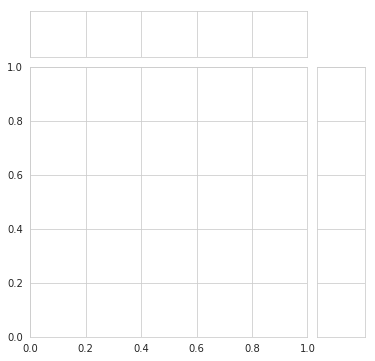

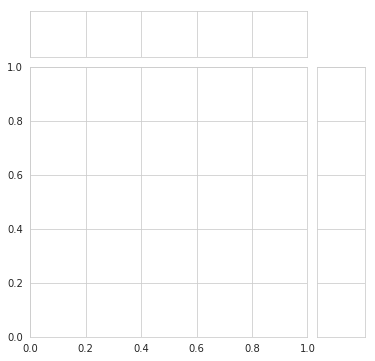

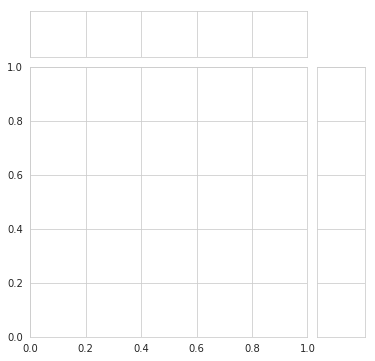

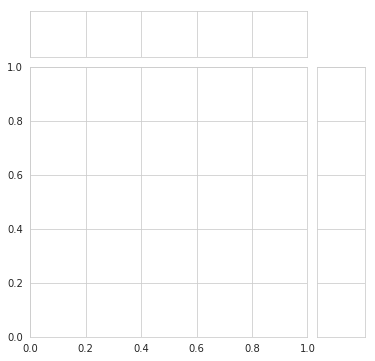

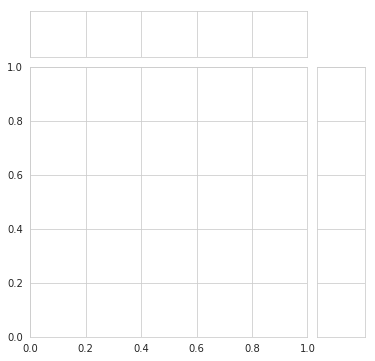

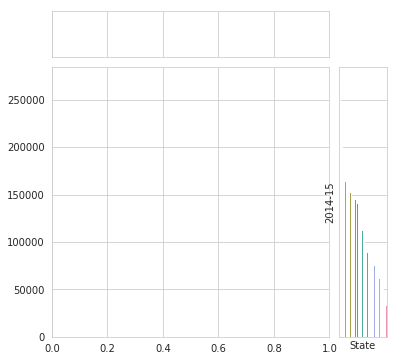

In [271]:
#plot of states contributing
sns.barplot( x = 'State' , y= '2014-15', data = gsdp_pc )
plt.xticks(rotation=90)
plt.show()

In [230]:
print(usable_gsva.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 32
Data columns (total 4 columns):
S.No.      1056 non-null object
Item       1056 non-null object
2014-15    1037 non-null float64
State      1056 non-null object
dtypes: float64(1), object(3)
memory usage: 41.2+ KB
None


In [231]:
df_by_state = usable_gsva.groupby('State')
print(df_by_state)

In [232]:
df_by_sector = usable_gsva.groupby('Item')

In [233]:
df_by_state

In [234]:
df_by_sector

In [235]:
#grouping my sector identifying top 5 sectors that are Trade & Repair service, Agriculture Forestry and Fishing, Manufacturing
#real estate, Taxes on Products
df_by_sector['2014-15'].mean().sort_values(ascending=False)

Item
Gross State Domestic Product                                            3.620481e+07
TOTAL GSVA at basic prices                                              3.313926e+07
Tertiary                                                                1.717157e+07
Secondary                                                               9.147876e+06
Trade & repair services*                                                7.763847e+06
Primary                                                                 6.819813e+06
Agriculture, forestry and fishing                                       5.916940e+06
Manufacturing                                                           5.428033e+06
Real estate, ownership of dwelling & professional services              5.018875e+06
Taxes on Products                                                       4.026981e+06
Trade, repair, hotels and restaurants                                   4.007980e+06
Crops                                                       

In [236]:
#GDP in descending order (who has contribted the highest)
df_by_state['2014-15'].sum().sort_values(ascending=False)

State
Maharashtra          7.254656e+08
Tamil_Nadu           4.571171e+08
Uttar_Pradesh        4.543814e+08
Karnataka            3.803077e+08
Gujarat              3.705102e+08
Rajasthan            2.703851e+08
Andhra_Pradesh       2.310627e+08
Kerala               2.223153e+08
Madhya_Pradesh       2.179216e+08
Telangana            2.171640e+08
Delhi                1.975145e+08
Haryana              1.852778e+08
Bihar                1.708492e+08
Punjab               1.593381e+08
Odisha               1.394391e+08
Chhattisgarh         1.008311e+08
Jharkhand            9.057520e+07
Assam                8.654288e+07
Uttarakhand          6.784708e+07
Himachal_Pradesh     4.389493e+07
Chandigarh           2.503506e+07
Goa                  1.661192e+07
Manipur              1.630650e+07
Tripura              1.340588e+07
Meghalaya            1.059206e+07
Puducherry           9.730683e+06
Nagaland             8.337683e+06
Arunachal_Pradesh    7.594695e+06
Sikkim               6.514898e+06
Mizoram 

In [237]:
#converting to a dataframe and extracting mean
bystate = pd.DataFrame(df_by_state['2014-15'].mean())

In [197]:
#deriving percentage
percentage = (100* bystate/bystate.sum()).round(0)

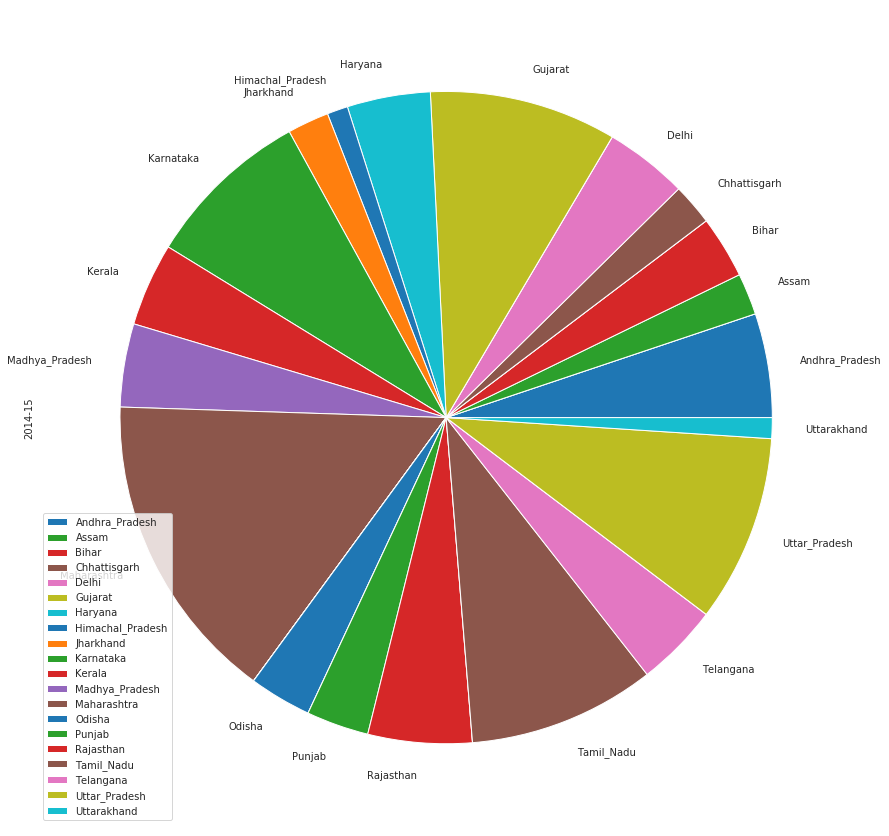

In [198]:
#Plot showing Maharashtra and Chattisgarh alog with Karnataka, Gujrat and UttarPradesh made most contributions
percentage_plot = percentage.plot.pie(subplots=True, figsize = (30,15))
plt.show()

In [199]:
df_by_sector['2014-15'].mean().sort_values(ascending=False)

Item
Gross State Domestic Product                                            3.620481e+07
TOTAL GSVA at basic prices                                              3.313926e+07
Tertiary                                                                1.717157e+07
Secondary                                                               9.147876e+06
Trade & repair services*                                                7.763847e+06
Primary                                                                 6.819813e+06
Agriculture, forestry and fishing                                       5.916940e+06
Manufacturing                                                           5.428033e+06
Real estate, ownership of dwelling & professional services              5.018875e+06
Taxes on Products                                                       4.026981e+06
Trade, repair, hotels and restaurants                                   4.007980e+06
Crops                                                       

In [238]:
bysector = usable_gsva.pivot_table(columns = ['Item', 'State'])

In [239]:
# Compare average GDP across Sectors
usable_pivot = usable_gsva.pivot_table(columns = 'State',values = '2014-15', index = 'Item', aggfunc = 'mean')
usable_gsva = usable_pivot.drop(['Goa','Delhi','Chandigarh'],axis=1)

In [283]:
df7 = usable_pivot
df7.isnull().sum()
# columns having at least one missing value
df7.isnull().any()

# above is equivalent to axis=0 (by default, any() operates on columns)
df7.isnull().any(axis=0)
# sum it up to check how many rows have all missing values
df7.isnull().all(axis=1).sum()
# sum of misisng values in each row
df7.isnull().sum(axis=1)
# summing up the missing values (column-wise)
round(100*(df7.isnull().sum()/len(df7.index)), 2)
# removing the three columns
df = df7.drop('Goa', axis=1)
df = df7.drop('Delhi', axis=1)
df = df7.drop('Chandigarh', axis=1)

round(100*(df7.isnull().sum()/len(df7.index)), 2)

State
Andhra_Pradesh       10.81
Arunachal_Pradesh    10.81
Assam                10.81
Bihar                10.81
Chandigarh           10.81
Chhattisgarh         10.81
Delhi                10.81
Goa                  10.81
Gujarat              21.62
Haryana              16.22
Himachal_Pradesh     10.81
Jharkhand            10.81
Karnataka            10.81
Kerala               10.81
Madhya_Pradesh       10.81
Maharashtra          10.81
Manipur              18.92
Meghalaya            16.22
Mizoram              10.81
Nagaland             10.81
Odisha               10.81
Puducherry           10.81
Punjab               10.81
Rajasthan            10.81
Sikkim               10.81
Tamil_Nadu           10.81
Telangana            10.81
Tripura              21.62
Uttar_Pradesh        10.81
Uttarakhand          13.51
dtype: float64

In [284]:
df7[df7.isnull().sum(axis=1) > 5]

#sns.distplot(usable_pivot)

State,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand
Item,,,,,,,,,,,,,,,,,,,,,
Road transport*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307147.0
Road transport**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Services incidental to transport*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2744163.0,NaN,...,NaN,NaN,NaN,NaN,NaN,864407.0,NaN,88721.0,NaN,NaN
Trade & repair services*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water transport,94200.0,0.0,4502.0,2228.0,0.0,0.0,574.0,17820.0,NaN,NaN,...,50349.0,2946.0,0.0,0.0,0.0,70414.0,0.0,NaN,681.0,NaN


In [285]:
# count the number of rows having > 5 missing values
# use len(df.index)
len(df7[df7.isnull().sum(axis=1) > 5].index)

5

In [286]:
100*(len(df7[df7.isnull().sum(axis=1) > 5].index) / len(df7.index))

13.513513513513514

In [295]:
# retaining the rows having <= 5 NaNs
df = df[df.isnull().sum(axis=1) <= 5]

# look at the summary again
round(100*(df7.isnull().sum()/len(df7.index)), 2)

State
Andhra_Pradesh        3.45
Arunachal_Pradesh     3.45
Assam                 3.45
Bihar                 3.45
Chandigarh            3.45
Chhattisgarh          3.45
Delhi                 3.45
Goa                   3.45
Gujarat               0.00
Haryana               3.45
Himachal_Pradesh      3.45
Jharkhand             3.45
Karnataka             3.45
Kerala                6.90
Madhya_Pradesh        3.45
Maharashtra           3.45
Manipur              10.34
Meghalaya             3.45
Mizoram               3.45
Nagaland              3.45
Odisha                3.45
Puducherry            3.45
Punjab                3.45
Rajasthan             3.45
Sikkim                3.45
Tamil_Nadu            0.00
Telangana             3.45
Tripura               0.00
Uttar_Pradesh         3.45
Uttarakhand           3.45
dtype: float64

In [293]:
# removing NaN Price rows
df7 = df7[~np.isnan(df7['Gujarat'])]


In [294]:
round(100*(df7.isnull().sum()/len(df7.index)), 2)


State
Andhra_Pradesh        3.45
Arunachal_Pradesh     3.45
Assam                 3.45
Bihar                 3.45
Chandigarh            3.45
Chhattisgarh          3.45
Delhi                 3.45
Goa                   3.45
Gujarat               0.00
Haryana               3.45
Himachal_Pradesh      3.45
Jharkhand             3.45
Karnataka             3.45
Kerala                6.90
Madhya_Pradesh        3.45
Maharashtra           3.45
Manipur              10.34
Meghalaya             3.45
Mizoram               3.45
Nagaland              3.45
Odisha                3.45
Puducherry            3.45
Punjab                3.45
Rajasthan             3.45
Sikkim                3.45
Tamil_Nadu            0.00
Telangana             3.45
Tripura               0.00
Uttar_Pradesh         3.45
Uttarakhand           3.45
dtype: float64

In [303]:
total_GDP = usable_pivot.loc["Gross State Domestic Product"]

In [311]:
primay = gsdp_state[gsdp_state.Item == 'Primary']
#tertiary = usable_pivot.loc["Tertiary"]

In [318]:
category =usable_gsva[usable_gsva['Item'].isin(['Primary','Secondary','Tertiary', 'Gross State Domestic Product' ])]
#primary = usable_pivot.loc["Primary"]

In [320]:
#secondary = usable_pivot.loc["Secondary"]
#quartile
category

,S.No.,Item,2014-15,State
6,Total,Primary,19113780.0,Rajasthan
10,Total,Secondary,13028794.0,Rajasthan
26,Total,Tertiary,26015812.0,Rajasthan
30,15,Gross State Domestic Product,61219447.0,Rajasthan
6,Total,Primary,9133354.0,Telangana
10,Total,Secondary,9924001.0,Telangana
26,Total,Tertiary,28471410.0,Telangana
30,15,Gross State Domestic Product,51117765.0,Telangana
6,Total,Primary,9009306.0,Odisha
10,Total,Secondary,8989693.0,Odisha


In [304]:

#quartile = [primary, secondary, tertiary]
#pd.Series(primary)
pd.Series(quartile)
percentage =  (primary+secondary+tertiary)/total_GDP.sum().round(0)

In [321]:
new_usable_pivot = category.pivot_table(columns = 'Item', values = '2014-15', aggfunc = np.sum)
new_usable_pivot

Item,Gross State Domestic Product,Primary,Secondary,Tertiary
2014-15,1.158554e+09,218234001.0,292732016.0,549490322.0


In [322]:
primaryS = (new_usable_pivot['Primary']/new_usable_pivot['Gross State Domestic Product'])*100

In [325]:
secondaryS = (new_usable_pivot['Secondary']/new_usable_pivot['Gross State Domestic Product'])*100

In [326]:
tertiaryS = (new_usable_pivot['Tertiary']/new_usable_pivot['Gross State Domestic Product'])*100

In [330]:
total_sectors = [primaryS, secondaryS, tertiaryS]
total_sectors

[2014-15    18.836757
 dtype: float64, 2014-15    25.267016
 dtype: float64, 2014-15    47.428978
 dtype: float64]

In [136]:
#create ana array of states and their respective sectors
sectors = ((np.asarray(usable_gsva['State'])))
a= set(sectors)
#print(a)
c = list(a)
b = pd.Series(c)
#print(c)

#create an array to annotate the heatmap
labels = (np.asarray(c))

#pivot - usable_pivot

#Create the Matplotlib figure and define the plot
fig, ax = plt.subplots(figsize=(12,7))

#adding title to the chart
title = " GDP per capita for all the states."
#Setting font size

plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])

#hide ticks for X & Y Axis
ax.set_xticks([])
ax.set_yticks([])

#Remove the axis
ax.axis('off')



(0.0, 1.0, 0.0, 1.0)

<Figure size 640x480 with 0 Axes>

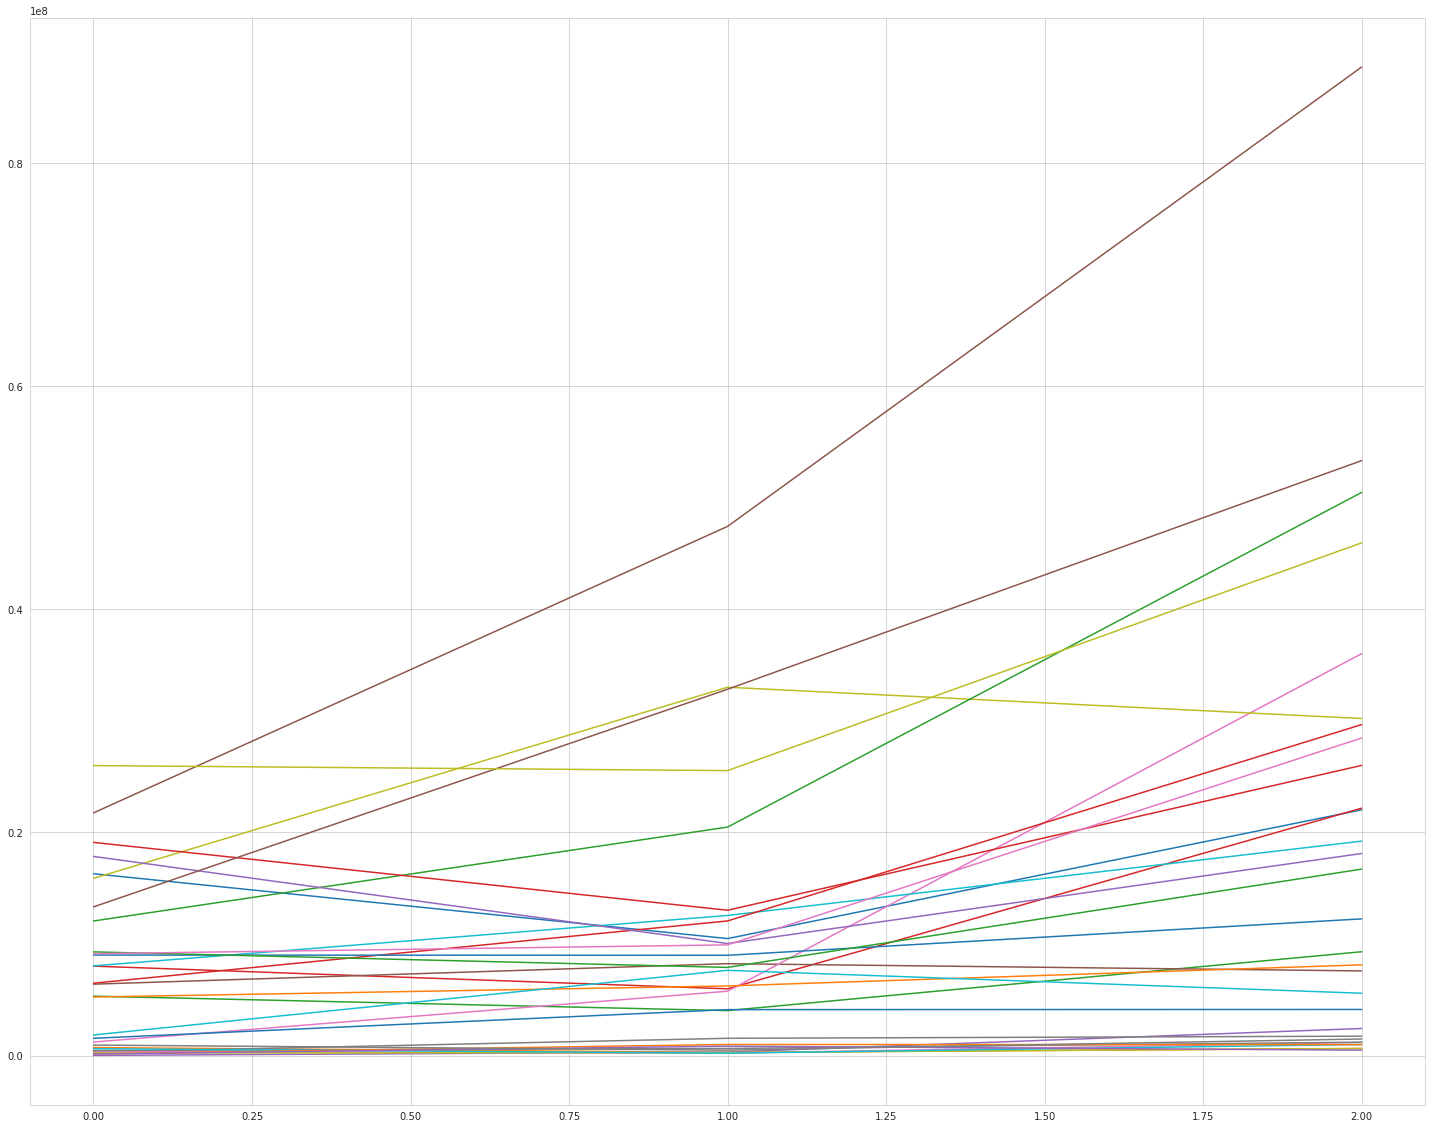

In [242]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.figure(figsize=(25,20))
plt.plot(quartile, scalex=True, )
plt.xlabel = "Quarterly"
plt.show()

In [66]:
pd.Series(primary)

State
Andhra_Pradesh       16303716.0
Arunachal_Pradesh      716959.0
Assam                 5326697.0
Bihar                 8019997.0
Chandigarh              16412.0
Chhattisgarh          6400817.0
Delhi                 1214345.0
Goa                    312129.0
Gujarat              15887187.0
Haryana               8040424.0
Himachal_Pradesh      1548366.0
Jharkhand             5248354.0
Karnataka            12066304.0
Kerala                6489442.0
Madhya_Pradesh       17854020.0
Maharashtra          21758383.0
Manipur                383140.0
Meghalaya              451050.0
Mizoram                225598.0
Nagaland               616178.0
Odisha                9009306.0
Puducherry             146428.0
Punjab                9296070.0
Rajasthan            19113780.0
Sikkim                 138776.0
Tamil_Nadu           13329774.0
Telangana             9133354.0
Tripura                942216.0
Uttar_Pradesh        25999255.0
Uttarakhand           1845972.0
Name: Primary, dtype: float64

In [85]:
GDP_percapita = data.loc["Per Capita GSDP (Rs.)"]

In [106]:
GDP_percapita.sort_values(ascending=False)

State
Delhi                274041.0
Goa                  271793.0
Chandigarh           250398.0
Sikkim               240274.0
Puducherry           175701.0
Haryana              164077.0
Kerala               154778.0
Uttarakhand          153076.0
Maharashtra          152853.0
Himachal_Pradesh     147330.0
Tamil_Nadu           146503.0
Karnataka            145141.0
Gujarat              141263.0
Telangana            139035.0
Punjab               126606.0
Arunachal_Pradesh    112718.0
Andhra_Pradesh       104977.0
Mizoram               97687.0
Nagaland              89607.0
Chhattisgarh          86860.0
Rajasthan             84837.0
Tripura               77358.0
Meghalaya             76228.0
Odisha                73979.0
Madhya_Pradesh        62989.0
Jharkhand             62091.0
Assam                 60621.0
Manipur               58442.0
Uttar_Pradesh         49450.0
Bihar                 33954.0
Name: Per Capita GSDP (Rs.), dtype: float64

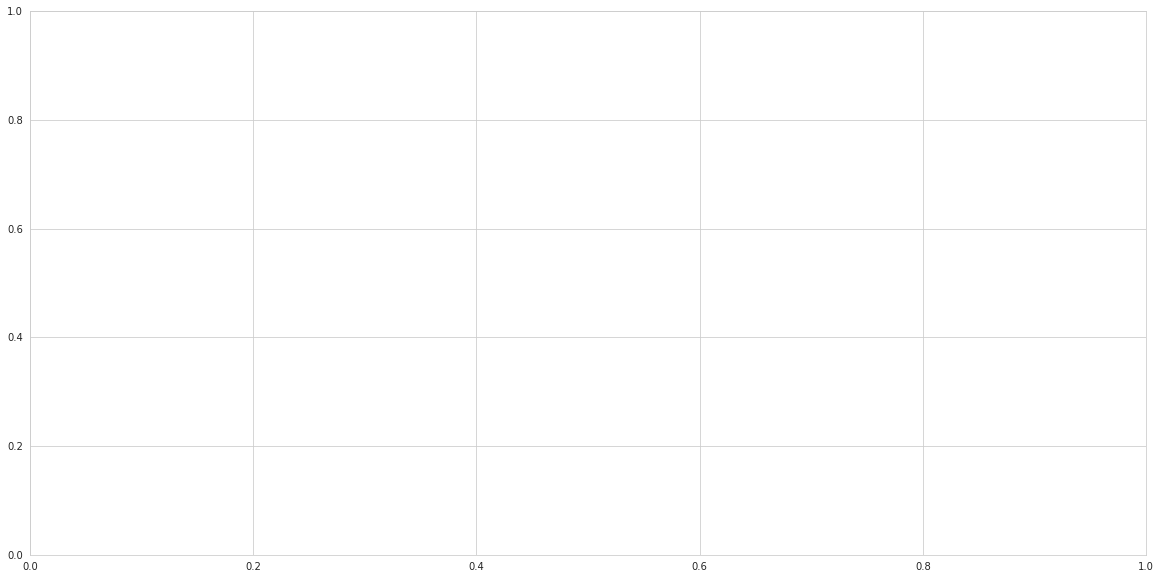

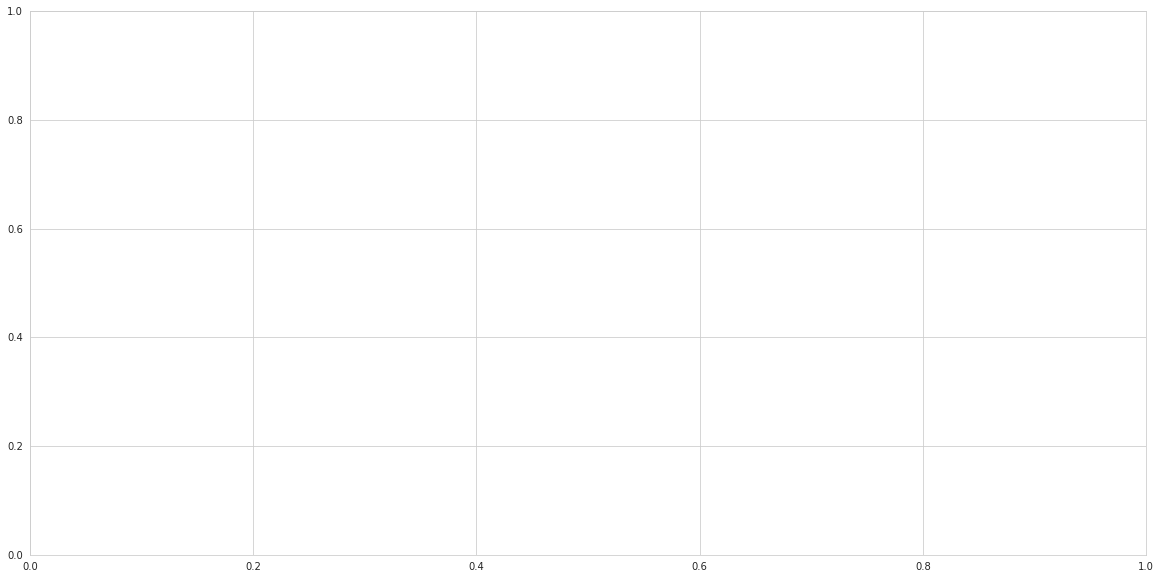

<Figure size 640x480 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 640x480 with 0 Axes>

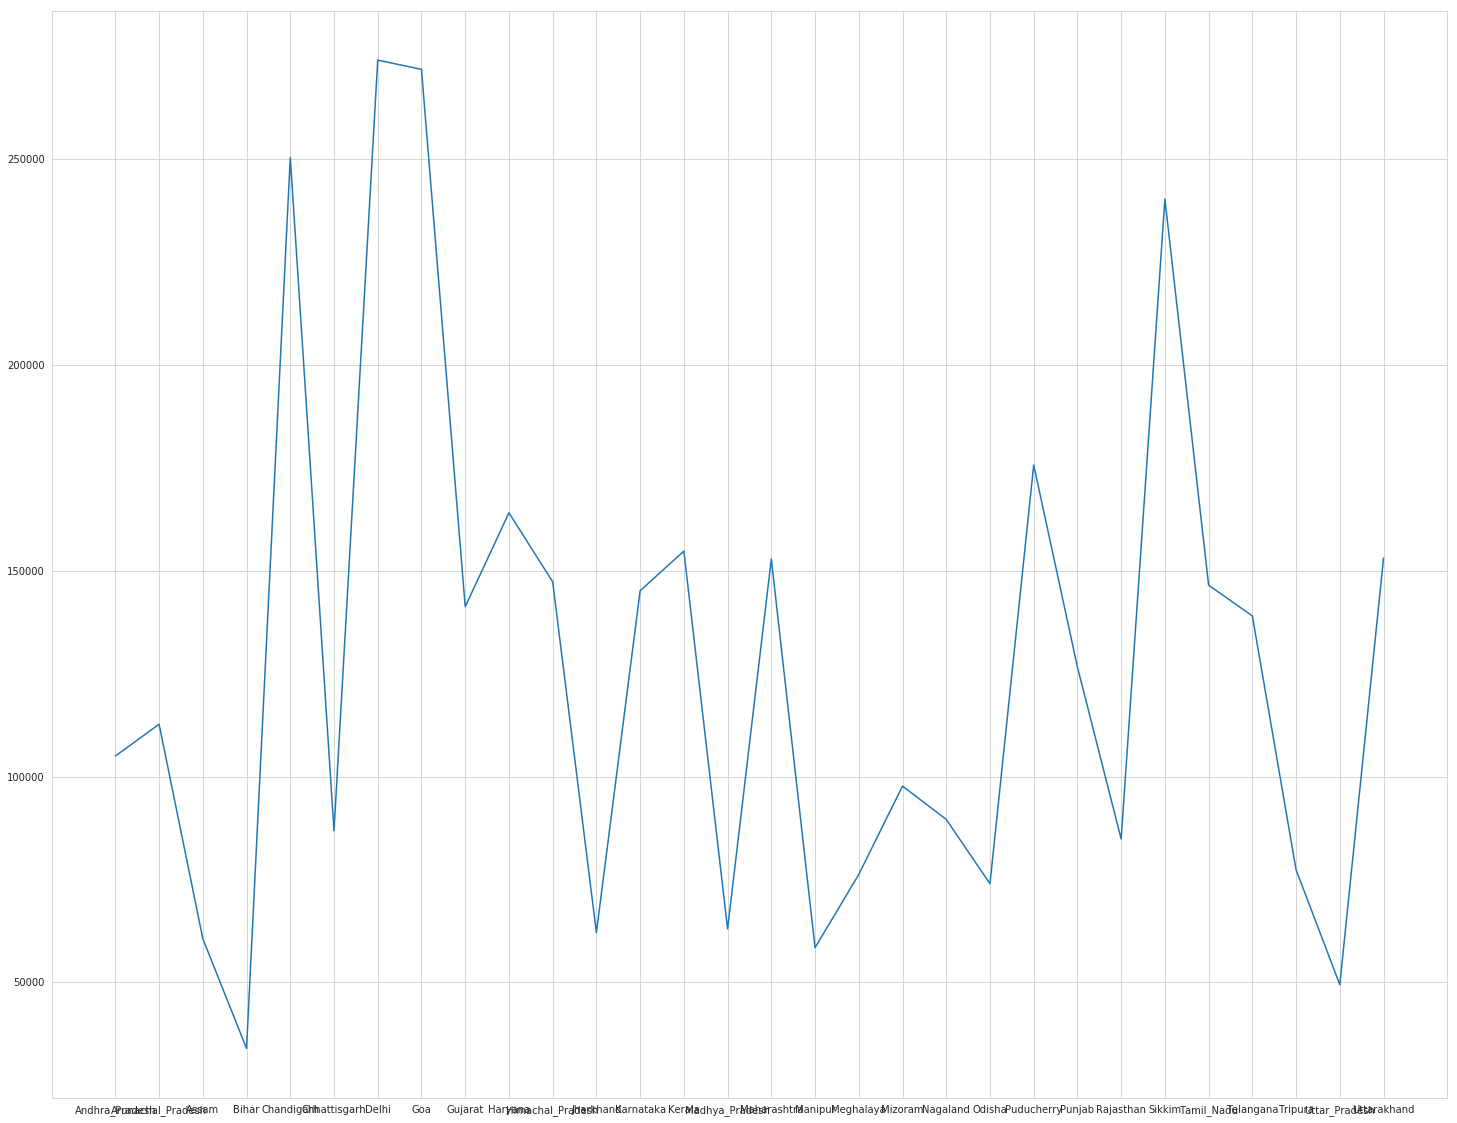

In [166]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.figure(figsize=(25,20))
plt.plot(GDP_percapita, scalex=True, )
plt.xlabel = "GDP_percapita"
plt.show()


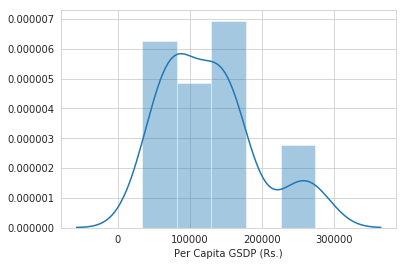

In [340]:
sns.distplot(GDP_percapita)
plt.show()

In [341]:
# GDP per capita per state
GDP_percapita